<a href="https://colab.research.google.com/github/roshanappa/Deep-Learning-Models./blob/master/Mnist_digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras import Sequential
from keras.utils import np_utils

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

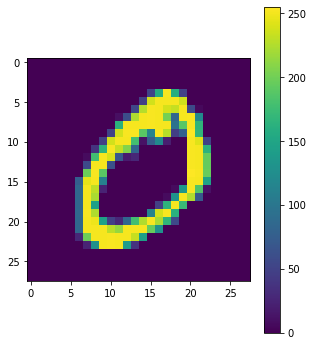

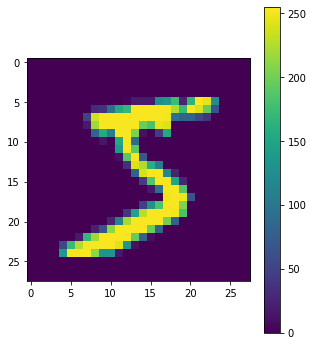

In [80]:
plt.figure(figsize=(5,6))
plt.imshow(x_train[1])
plt.colorbar()
plt.show()

plt.figure(figsize=(5,6))
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [81]:
x_train.shape

(60000, 28, 28)

In [82]:
x_test.shape

(10000, 28, 28)

From the above we can see the figure with pixel size is 255 that is high actually our Articial Neural Netwok works on only the 0 to 1.So we need to rescale them.

In [0]:
x_train = x_train/255
x_test  = x_test/255

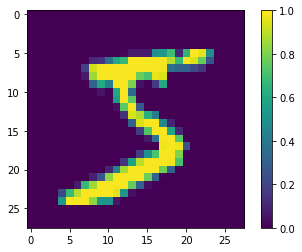

In [84]:
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

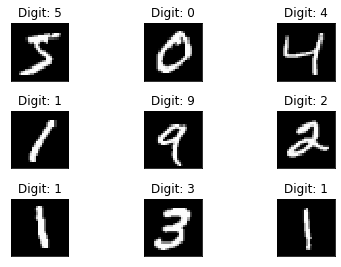

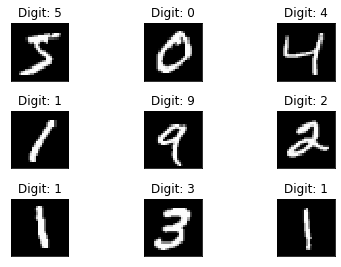

In [85]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

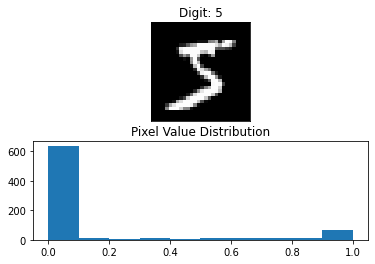

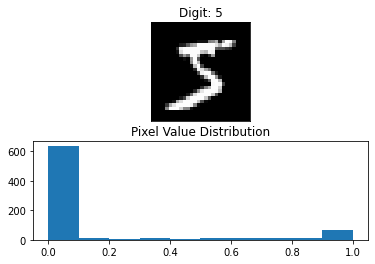

In [86]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

Since our images are not in size that 3 dimension and we are going to use the Convolutional Neural network so we resize them

In [87]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [89]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [90]:


y_train  # These are the classes.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
input_shape=x_train[0].shape

## Create and Model.

In [0]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=input_shape))
model.add(Dropout(0.10))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.10))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax',kernel_initializer='he_uniform'))


In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [95]:
history = model.fit(x_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1193 - accuracy: 0.9632 - val_loss: 0.0424 - val_accuracy: 0.9860
Epoch 2/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0392 - val_accuracy: 0.9871
Epoch 3/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0336 - val_accuracy: 0.9901
Epoch 4/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0265 - val_accuracy: 0.9895
Epoch 5/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0347 - val_accuracy: 0.9903
Epoch 6/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0343 - val_accuracy: 0.9898
Epoch 7/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0353 - val_ac

In [97]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0303 - accuracy: 0.9918


## Save The Model.

In [109]:
model.save('model.h5')
print("Saved model to disk")

Saved model to disk


## Learning Curve.

In [110]:
history.history

{'accuracy': [0.9631500244140625,
  0.9851999878883362,
  0.989216685295105,
  0.991349995136261,
  0.9931333065032959,
  0.9939000010490417,
  0.9952333569526672,
  0.9956833124160767,
  0.9964500069618225,
  0.9963499903678894],
 'loss': [0.11930793523788452,
  0.04857486113905907,
  0.03569653257727623,
  0.02730322815477848,
  0.02135862410068512,
  0.019059808924794197,
  0.01470535434782505,
  0.013548356480896473,
  0.01153230294585228,
  0.012367087416350842],
 'val_accuracy': [0.9860000014305115,
  0.9871000051498413,
  0.9901000261306763,
  0.9894999861717224,
  0.9902999997138977,
  0.989799976348877,
  0.9908999800682068,
  0.9896000027656555,
  0.9904999732971191,
  0.9918000102043152],
 'val_loss': [0.042428795248270035,
  0.039161816239356995,
  0.03359246626496315,
  0.02650398202240467,
  0.034707315266132355,
  0.034324076026678085,
  0.03533068299293518,
  0.036476682871580124,
  0.03436256945133209,
  0.030347980558872223]}

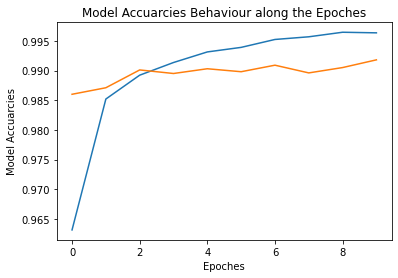

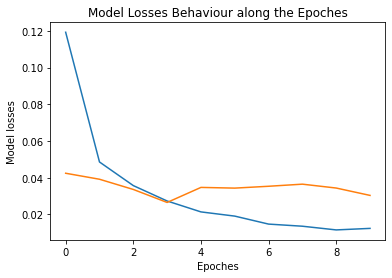

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Model Accuarcies')
plt.title('Model Accuarcies Behaviour along the Epoches')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoches')
plt.ylabel('Model losses')
plt.title('Model Losses Behaviour along the Epoches')
plt.show()

From teh above we can say the validation data is not given the good performance along the epoches and  but the accuaracies that we got from the training is good  and voice versa for the loss graph over the epoches.

## Evaluate the Performance of the model.

In [0]:
from tensorflow.keras.models import load_model

In [114]:
mnist_model = load_model('/content/model.h5')

In [115]:
loss_and_metrics = mnist_model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0303 - accuracy: 0.9918


In [116]:
print('Test_loss :-',loss_and_metrics[0])
print('Test_Accuracies :-',loss_and_metrics[1])

Test_loss :- 0.030299518257379532
Test_Accuracies :- 0.9918000102043152


# Check the Prediction of Our Model.

In [118]:
predicted_classes=mnist_model.predict_classes(x_test)
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [120]:
print('Accuarcy :-',accuracy_score(y_test,predicted_classes))

Accuarcy :- 0.9918


## To cross varify whether we corectly classify or not.

In [0]:
correct_indices = np.nonzero(predicted_classes==y_test)[0]

In [0]:
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [129]:
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

9918  classified correctly
82  classified incorrectly


In [131]:
mat = confusion_matrix(y_test,predicted_classes)
mat

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1131,    0,    1,    1,    0,    1,    1,    0,    0],
       [   2,    0, 1024,    0,    0,    0,    0,    6,    0,    0],
       [   0,    0,    0, 1006,    0,    3,    0,    1,    0,    0],
       [   0,    0,    1,    0,  970,    0,    2,    2,    3,    4],
       [   1,    0,    0,    6,    0,  883,    2,    0,    0,    0],
       [   2,    1,    0,    0,    2,    2,  949,    0,    2,    0],
       [   0,    1,    3,    0,    3,    0,    0, 1020,    0,    1],
       [   1,    0,    0,    2,    0,    1,    0,    1,  968,    1],
       [   0,    0,    1,    5,    6,    2,    0,    4,    1,  990]])

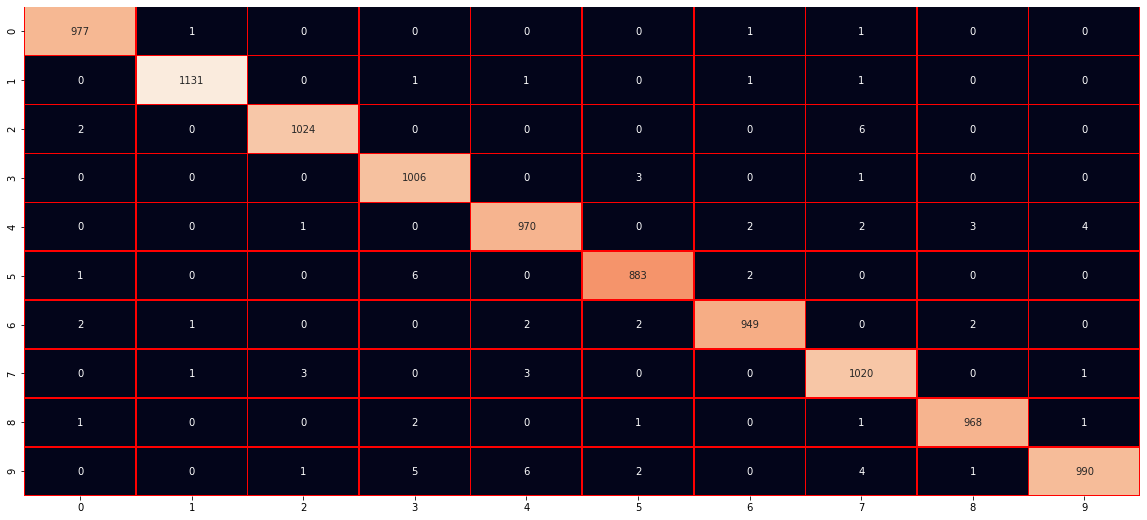

In [132]:
plt.figure(figsize=(20,9))
sns.heatmap(mat,annot=True,fmt='d',linewidths=0.5,linecolor='red',cbar=False,xticklabels=list('0123456789'),yticklabels=list('0123456789'))
plt.show()

## Cross Validation 

In [0]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [138]:
def set_model():
  model = Sequential()
  model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=input_shape))
  model.add(Dropout(0.10))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
  model.add(Dropout(0.10))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dropout(0.1))
  model.add(Dense(10,activation='softmax',kernel_initializer='he_uniform'))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model

model 

Classifier = KerasClassifier(set_model,batch_size=20,epochs=10)
accuracy = cross_val_score(Classifier,x_train,y_train,scoring='accuracy',cv=10,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.1min finished


In [143]:
accuracy

array([0.989     , 0.98433333, 0.99066667, 0.98766667, 0.98883333,
       0.99016667, 0.98833333, 0.98933333, 0.99      , 0.992     ])

In [145]:
print('Mean of Acccuarcies the cross validation model :-',round(accuracy.mean(),2))
print('Variance of Acccuarcies the cross validation model :-',accuracy.std())

Mean of Acccuarcies the cross validation model :- 0.99
Variance of Acccuarcies the cross validation model :- 0.0019561867668161717


Mean of the accuracy is close to accuarcy of the model that we had calculated previously  and and Variance inbetween them is not so much high.It is very less therefore we can say our model very good.

## Thank You !!!